**Izris pogostosti imen v casovnem obdobju** <br> Ker smo nazadnje z lazjimi imenskimi popravki dobili cudne rezultate sem s chatgpt-jem zgeneriral vecji set imenskih popravkov.

importi:

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict, Counter
import json
from pathlib import Path

In [2]:
with open('combined_finish.json', 'r', encoding='utf-8') as f:
    clanki = json.load(f)

treba popravit, da se nalozijo z datoteke:

In [3]:
def nalozi_popravke(pot="imenski_popravki.json"):
    if Path(pot).exists():
        with open(pot, "r", encoding="utf-8") as f:
            return json.load(f)
    return {}

In [4]:
IMENSKI_POPRAVKI=nalozi_popravke()

In [5]:
def popravi_ime(ime):
    popravljeno=IMENSKI_POPRAVKI.get(ime, ime)
    if(popravljeno==''):
        return ime
    return popravljeno


In [6]:
print(popravi_ime("Bidn"))

Joe Biden


In [7]:
def izrisi_top_osebe(clanki, datum_od, datum_do, ponovitve=True, num=10, popravi=False):
    # Parsiraj datume
    datum_od = datetime.strptime(datum_od, "%d. %m. %Y")
    datum_do = datetime.strptime(datum_do, "%d. %m. %Y")

    stevci = defaultdict(int)

    for clanek in clanki:
        # Pretvori datum članka
        try:
            datum_clanka = datetime.strptime(clanek["date"].strip(), "%d. %m. %Y %H.%M")
        except:
            continue  # preskoči če je napačen datum

        if datum_od <= datum_clanka <= datum_do:
            persons = clanek.get("persons", {})
            ze_dodani = set()

            for ime, count in persons.items():
                if popravi:
                    pravo_ime = popravi_ime(ime)
                else:
                    pravo_ime = ime
                if pravo_ime==None:
                    continue
                if ponovitve:
                    stevci[pravo_ime] += count
                else:
                    if pravo_ime not in ze_dodani:
                        stevci[pravo_ime] += 1
                        ze_dodani.add(pravo_ime)
    # Top 10 oseb
    najpogostejsi = Counter(stevci).most_common(num)

    # Priprava za graf
    imena = [ime for ime, _ in najpogostejsi]
    stevila = [stevilo for _, stevilo in najpogostejsi]
    print(najpogostejsi)
    plt.figure(figsize=(10, 6))
    plt.barh(imena[::-1], stevila[::-1], color='skyblue')
    plt.xlabel('Pojavitve' if ponovitve else 'Število člankov z omembo')
    plt.title(f"Top 10 oseb med {datum_od.strftime('%d.%m.%Y')} in {datum_do.strftime('%d.%m.%Y')}")
    plt.tight_layout()
    plt.show()

**Pomembnost normalizacije imen**

Nenormalizirana imena:

[('Trump', 50420), ('Janša', 39517), ('Slovenec', 39063), ('Pahor', 35715), ('Janez Janša', 26049), ('Američan', 24748), ('Celzij', 21091), ('Levica', 20746), ('Erjavec', 19125), ('Putin', 18826)]


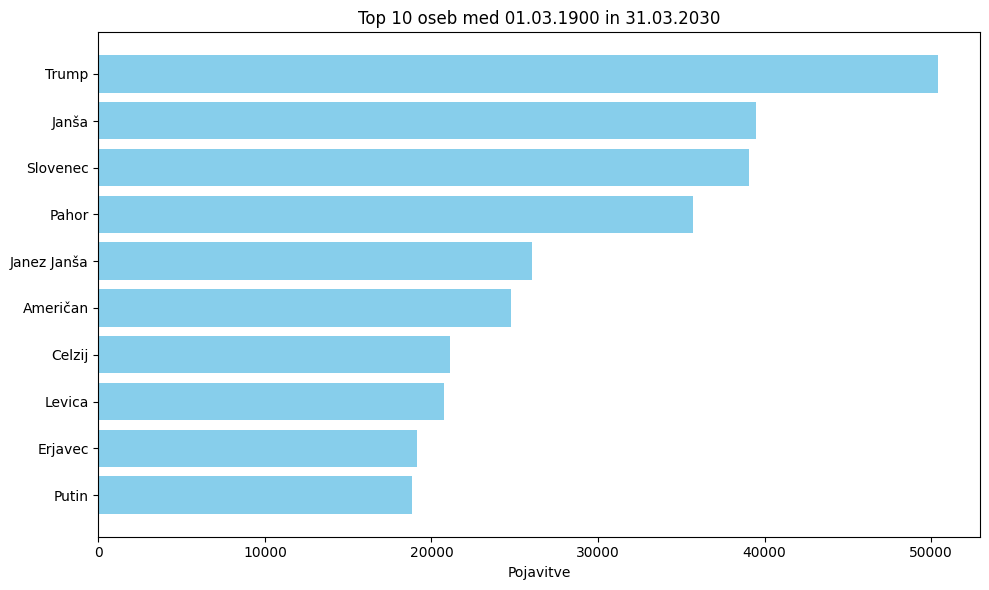

In [8]:
izrisi_top_osebe(clanki, "01. 03. 1900", "31. 3. 2030", ponovitve=True, num=10)

Normalizirana imena:

[('Janez Janša', 67351), ('Donald Trump', 64990), ('Pahor', 35715), ('Vladimir Putin', 29176), ('Karl Erjavec', 28508), ('Miro Cerar', 27309), ('Zoran Janković', 23169), ('Barack Obama', 21362), ('George Bush', 18940), ('Borut Pahor', 18925)]


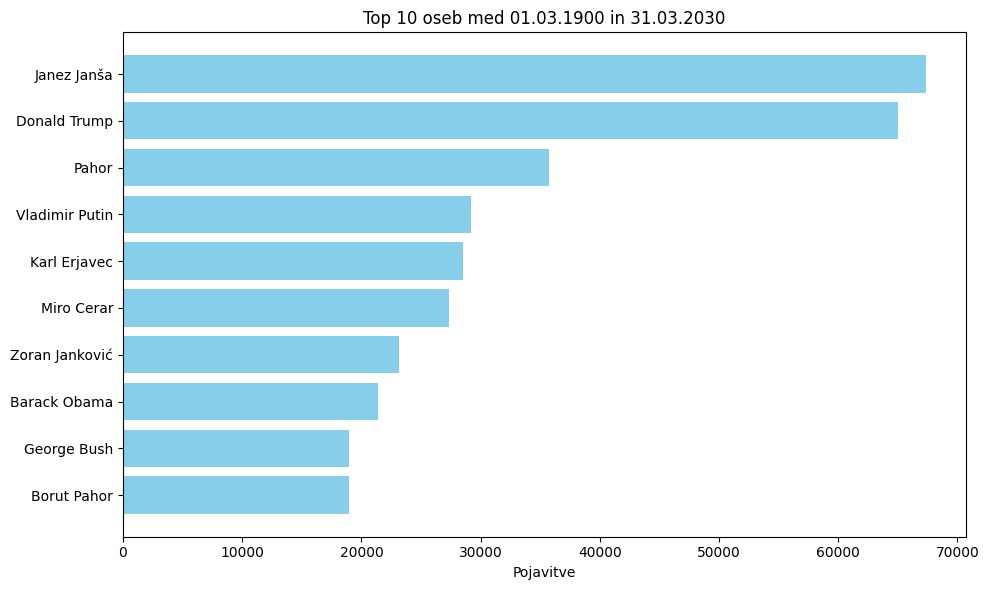

In [9]:
izrisi_top_osebe(clanki, "01. 03. 1900", "31. 3. 2030", ponovitve=True, num=10, popravi=True)